In [1]:
#Q1)Import the necessary libraries 
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy

In [7]:
#Q2)Read the data as a data frame (3 marks)
df = pd.read_csv("C:/Users/user/Downloads/insurance.csv")

In [9]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [76]:
#Q3Perform basic EDA which should include the following and print out your insights at every step. ( 27
#marks)
#Q)3.a.  Shape of the data
df.shape #Shape of the data 


#Answer: The dataframe Insurance.csv has 1338 row and 7 columns

(1338, 7)

In [11]:
#Q) 3.b.   Data type of each attribute
df.info() #Data type of each attribute

#Answer: The attributes age and children are integer type, sex,smoker,region are object type, bmi and charges are float datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
#Q)3.c.  Checking the presence of missing values 

df.isnull().sum() #Checking the presence of missing values 

#Answer: From the output, it can be inferred that there are no missing values present in the given dataframe

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
#Q) 3.d.  5 point summary of numerical attributes

df.describe() #point summary of numerical attributes

#Answer: 1. Mostly the people are in the age group of 51 years(75%)
# 2. Number of children is motly not more than 2 children with maximum of upto 5 children
# 3. charges are highly skewed
# 4. Mostly the bmi is 34.67
# 5. 18 upto 27 years age group are mostly not having children.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


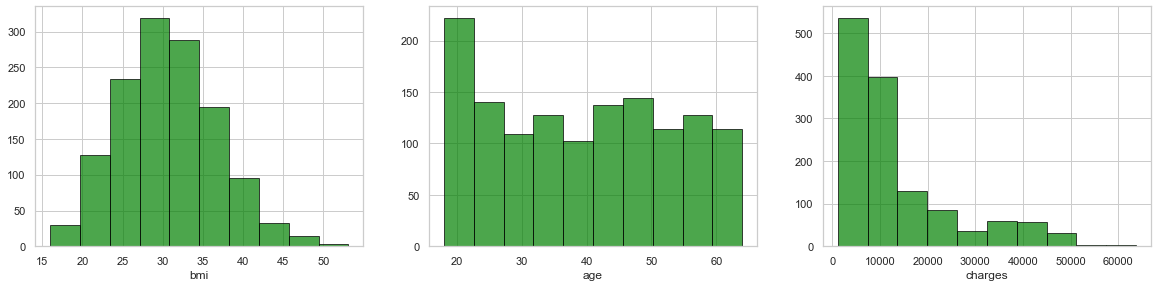

In [25]:
#Q) 3.e.  Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. 
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.bmi, color='green', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df.age, color='green', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df.charges, color='green', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

plt.show()

# Answer: bmi is slightly left skewed and charges are highly left skewed but age is almost uniformly distributed.

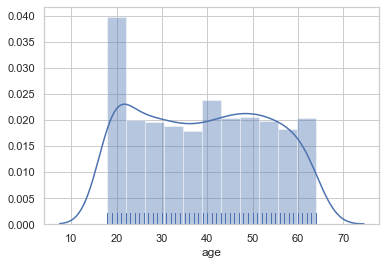

In [26]:
sns.distplot(df['age'], kde=True, rug=True) #Distribution of ‘age’

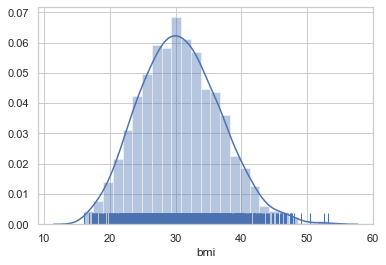

In [28]:
sns.distplot(df['bmi'], kde=True, rug=True); #Distribution of ‘bmi’

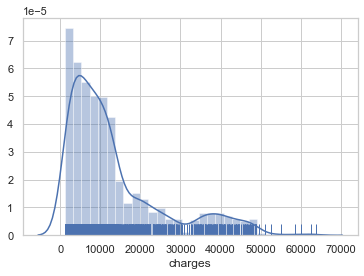

In [29]:
sns.distplot(df['charges'], kde=True, rug=True); #Distribution of ‘charges’

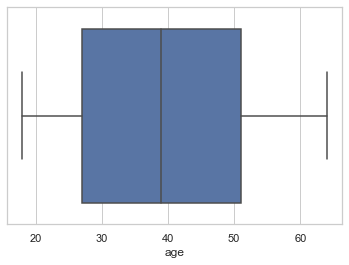

In [30]:
sns.set(style="whitegrid")
sns.boxplot(df["age"])

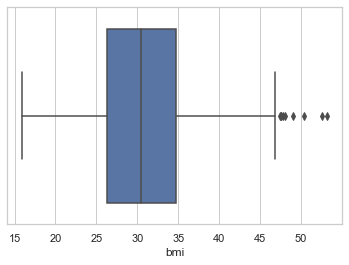

In [32]:
sns.boxplot(df["bmi"])

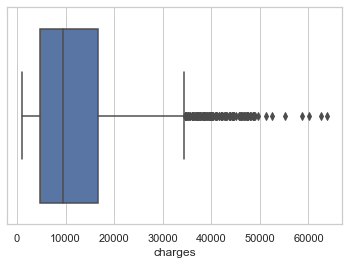

In [34]:
sns.boxplot(df["charges"])

In [64]:
# Q) 3.f.  Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.bmi),
                                       stats.skew(df.age),stats.skew(df.charges)]},
                        index=['bmi','age','charges']) 
Skewness

#Answer: Skewness of bmi is 0.28 which is very less, age is 0.05 which represents almost negligible skewness but of charges, skewness value is 1.51 which is high.

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


In [77]:
#Q) 3.g.  Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

Interquartile_range = np.subtract(*np.percentile(df['charges'], [75, 25]))
print(Interquartile_range)


#Answer: Number of outliers out of 1338 data for each of charges, bmi, age are 139,9 and 0 respectively.

11899.625365


In [81]:
q25, q75 = np.percentile(df['charges'], 25), np.percentile(df['charges'], 75)
Interquartile_range = q75 - q25
cut_off = Interquartile_range * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df['charges'] if x < lower or x > upper]
print('Number of outliers for charges in 1338 data are- %d' % len(outliers))

Number of outliers for charges in 1338 data are- 139


In [82]:
q25, q75 = np.percentile(df['bmi'], 25), np.percentile(df['bmi'], 75)
Interquartile_range = q75 - q25
cut_off = Interquartile_range * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df['bmi'] if x < lower or x > upper]
print('Number of outliers for bmi in 1338 data are- %d' % len(outliers))

Number of outliers for bmi in 1338 data are- 9


In [83]:
q25, q75 = np.percentile(df['age'], 25), np.percentile(df['age'], 75)
Interquartile_range = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df['age'] if x < lower or x > upper]
print('Number of outliers for age in 1338 data are- %d' % len(outliers))

Number of outliers for age in 1338 data are- 0


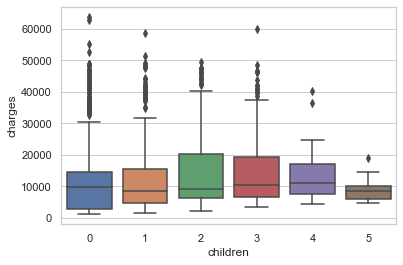

In [40]:
#Q)3.h. Distribution of categorical columns (include children)
sns.boxplot(x='children', y='charges', data= df)

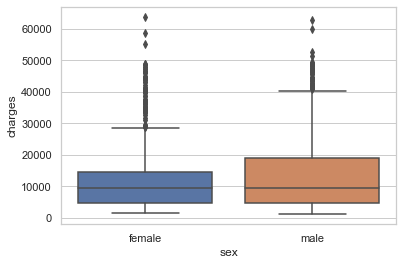

In [41]:
sns.boxplot(x='sex', y='charges', data= df)

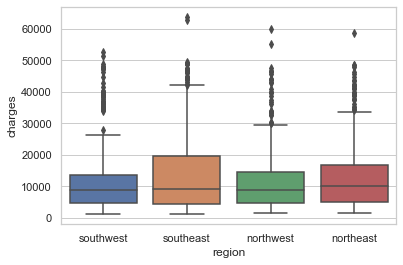

In [42]:
sns.boxplot(x='region', y='charges', data= df)

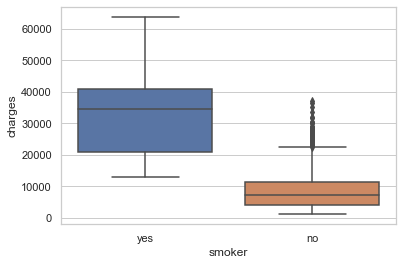

In [43]:

sns.boxplot(x='smoker', y='charges', data= df)

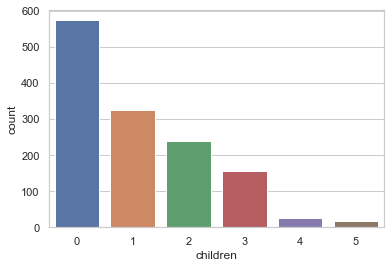

In [44]:
sns.countplot(df['children'])


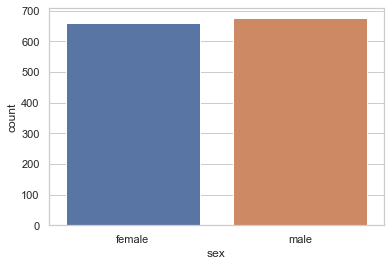

In [45]:
sns.countplot(df['sex'])

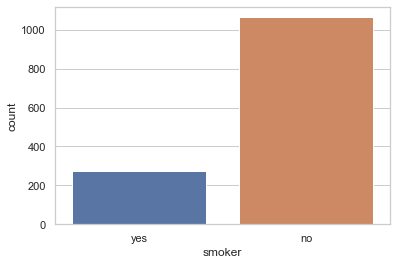

In [46]:
sns.countplot(df['smoker'])

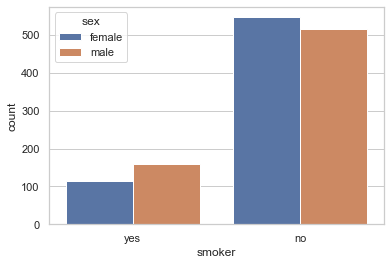

In [47]:

sns.countplot(df['smoker'],hue = df['sex'])

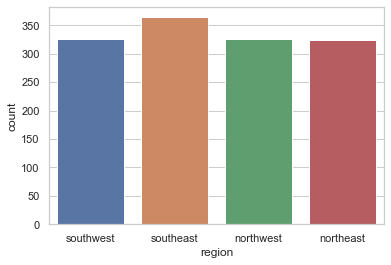

In [48]:

sns.countplot(df['region'])

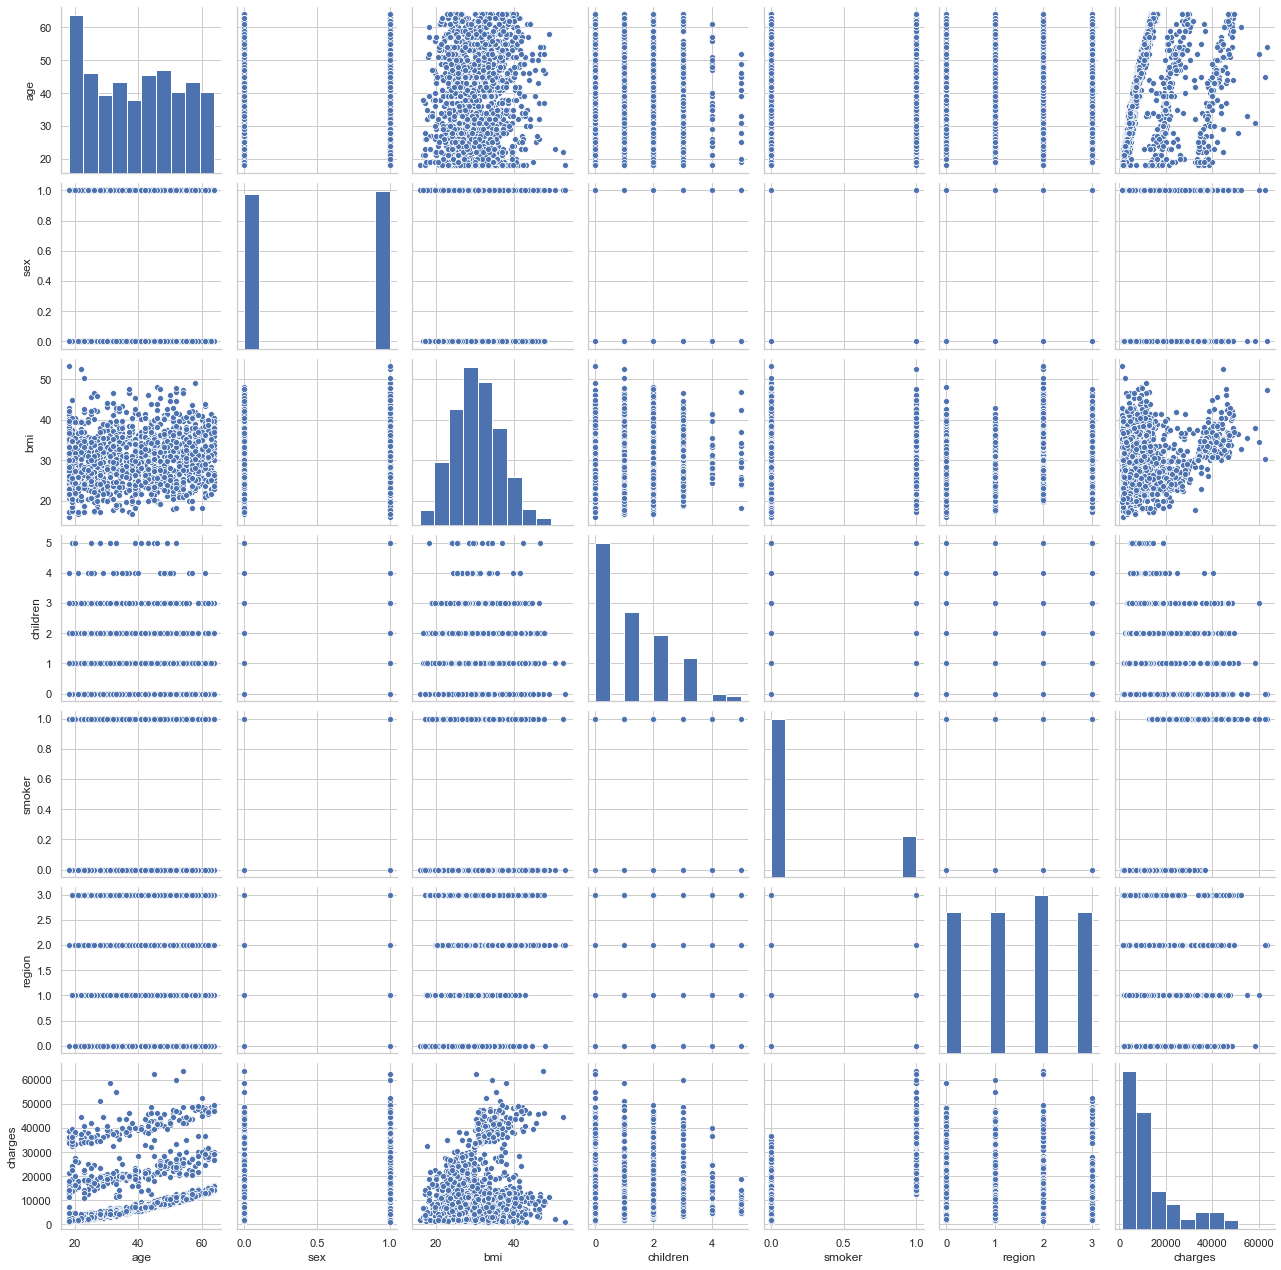

In [55]:
#Q)3.i.  Pair plot that includes all the columns of the data frame 

insurance_df_encoded = copy.deepcopy(df)
insurance_df_encoded.loc[:,['sex', 'smoker', 'region']] = df.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 
sns.pairplot(insurance_df_encoded)  
plt.show()

In [57]:
#Q04.a.  Do charges of people who smoke differ significantly from the people who don't? 
df.smoker.value_counts()

#Yes, from the scatterplot we can see that people who smoke differ significantly from the people who don't

no     1064
yes     274
Name: smoker, dtype: int64

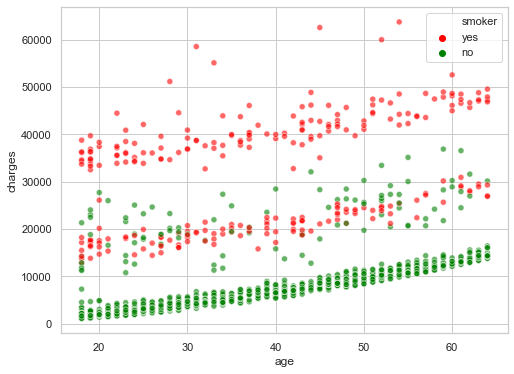

In [58]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.smoker,palette= ['red','green'] ,alpha=0.6)
plt.show()

In [84]:
#T-test
s = "Same charges for smokers and non smokers"   
ns = "Not same charges for smokers and non smokers"

x = np.array(df[df.smoker == 'yes'].charges) 
y = np.array(df[df.smoker == 'no'].charges)


t, p_value  = stats.ttest_ind(x,y, axis = 0)  
print(p_value)


#Ans: as p_value<0.05, therefore people who smoke differ significantly from the people who don't

8.271435842177219e-283


In [66]:
#Q)4.b.  Does bmi of males differ significantly from that of females? 
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

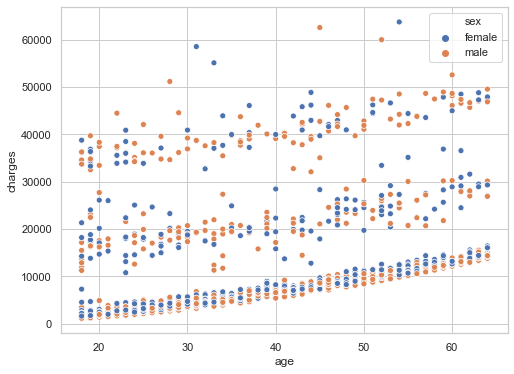

In [67]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.sex  )
plt.show()

In [85]:
y = "bmi is affected by gender"   
n = "bmi is not affected by gender"   

x = np.array(df[df.sex == 'male'].bmi)  
y = np.array(df[df.sex == 'female'].bmi) 

t, p_value  = stats.ttest_ind(x,y, axis = 0)  

print(p_value)

# Answer: As p_value>0.05, therefore bmi is not getting affected by gender

0.08997637178984932


In [89]:
#Q) 4.c.  Is the proportion of smokers significantly different in different genders?
y = "smoking habits are affected by Gender" 
n = "smoking habits are not affected by Gender"   

crosstab = pd.crosstab(df['sex'],df['smoker']) 
chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)
print(p_value)

# Answer: Smoking habits are affected by gender.

0.006548143503580696


In [86]:
#Q)4.d.  Is the distribution of bmi across women with no children, one child and two children, the same ?


# anova test 
y = "Women bmi are affected by number of children"   
n = "Women bmi are not affected by number of children"   

df_women = copy.deepcopy(df[df['sex'] == 'female'])

zero = df_women[df_women.children == 0]['bmi']
one = df_women[df_women.children == 1]['bmi']
two = df_women[df_women.children == 2]['bmi']

f_stat, p_value = stats.f_oneway(zero,one,two)
print(p_value)


#Answer: It can be inferred from null hypothesis that women bmi are not affected by number of children.

0.7158579926754841
